# **What is the most optimal skill to learn for Data Analysts?**

### **Methodology**
1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

### **Original Exploration**
[15_Matplotlib_Scatter_Plots.ipynb](https://github.com/adinramaadin/Python_Project-2_Data-Job-Market/blob/main/Exploring_the_Data/14_Matplotlib_Scatter_Plots.ipynb)

[16_Matplotlib_Advanced_Customization.ipynb](https://github.com/adinramaadin/Python_Project-2_Data-Job-Market/blob/main/Exploring_the_Data/15_Matplotlib_Advanced_Customization.ipynb)

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt  
from matplotlib.colors import LinearSegmentedColormap

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# List of ASEAN countries
asean_countries = [
    'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 
    'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'
]

# Oceanic countries in the AANZFTA
oceanic_countries = [
    'Australia', 'New Zealand'
]

# Combined list for AANZFTA
aanzfta_countries = asean_countries + oceanic_countries


df_DA_AANZFTA = df[(df['job_title'] == 'Data Analyst') & (df['job_country'].isin(aanzfta_countries))].copy()
df_DA_AANZFTA = df_DA_AANZFTA.dropna(subset=['salary_year_avg'])
df_DA_AANZFTA_exploded = df_DA_AANZFTA.explode('job_skills')
df_DA_AANZFTA_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
120659,98500.0,r
120659,98500.0,sql
120659,98500.0,javascript
120659,98500.0,excel
120659,98500.0,spss


## **Calculate Percent of Job Postings that Have Skills**

In [3]:
# using df_DA find the count of skills and also the median salary for each skill
df_DA_skills = df_DA_AANZFTA_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_AANZFTA)  # Find count of Data Analyst jobs in US with salary info

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,19,100500.00,90.476190
python,11,100500.00,52.380952
tableau,10,93852.00,47.619048
power bi,8,79000.00,38.095238
r,8,99500.00,38.095238
excel,7,98500.00,33.333333
aws,4,103750.00,19.047619
bigquery,3,111175.00,14.285714
flow,2,108087.50,9.523810


In [4]:
skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

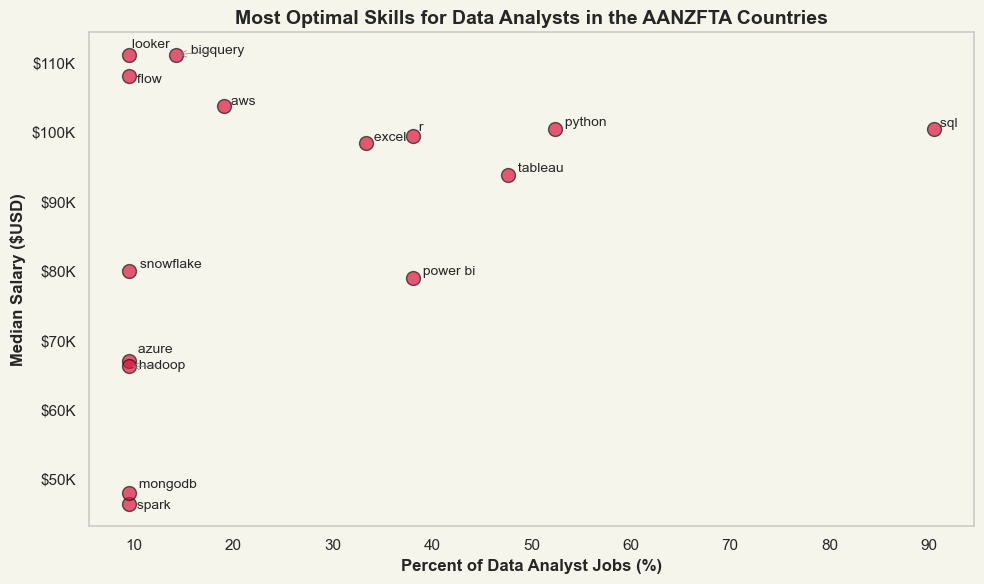

In [10]:
from adjustText import adjust_text

plt.figure(figsize=(10, 6))
plt.scatter(
    df_DA_skills_high_demand['skill_percent'], 
    df_DA_skills_high_demand['median_salary'], 
    s=100,  # Marker size
    c='crimson',  # Marker color
    alpha=0.7,  # Transparency
    edgecolors='k'  # Black edges
)
plt.xlabel('Percent of Data Analyst Jobs (%)', fontsize=12, weight='bold')
plt.ylabel('Median Salary ($USD)', fontsize=12, weight='bold')  
plt.title('Most Optimal Skills for Data Analysts in the AANZFTA Countries', fontsize=14, weight='bold')


# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt, fontsize=10))

# Adjust text to avoid overlap and add arrows
adjust_text(
    texts, 
    arrowprops=dict(arrowstyle='->', color='gray', lw=0.5), 
    expand_points=(1.2, 1.2),  
    expand_text=(1.2, 1.2)  
)

sns.set_theme(style='whitegrid')  
plt.gcf().set_facecolor('#F6F5EB')  
plt.rcParams['axes.facecolor'] = '#F6F5EB'
plt.gca().grid(False)  
plt.tight_layout()
plt.show()

## **Coloring by Technology**

In [11]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['sap',
  'excel',
  'looker',
  'ssis',
  'alteryx',
  'msaccess',
  'tableau',
  'powerbi',
  'ssrs',
  'esquisse',
  'sas',
  'visio',
  'dax',
  'powerpoint',
  'ms access',
  'sheets',
  'datarobot',
  'power bi',
  'outlook',
  'microstrategy',
  'nuix',
  'cognos',
  'sharepoint',
  'splunk',
  'qlik',
  'word',
  'spreadsheet',
  'spss'],
 'programming': ['html',
  'c++',
  'vba',
  'shell',
  'fortran',
  'objective-c',
  'perl',
  'java',
  'c#',
  'ocaml',
  'css',
  'lua',
  'clojure',
  'no-sql',
  'visual basic',
  'c',
  'solidity',
  'f#',
  'mongodb',
  'powershell',
  'haskell',
  'nosql',
  'crystal',
  'sas',
  'mongo',
  'ruby',
  'dart',
  't-sql',
  'typescript',
  'php',
  'javascript',
  'rust',
  'elixir',
  'bash',
  'scala',
  'r',
  'cobol',
  'sql',
  'swift',
  'python',
  'matlab',
  'delphi',
  'visualbasic',
  'apl',
  'sass',
  'vb.net',
  'julia',
  'kotlin',
  'assembly',
  'pascal',
  'erlang',
  'lisp',
  'groovy',
  'go',
  'gol

In [12]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,sap
0,analyst_tools,excel
0,analyst_tools,looker
0,analyst_tools,ssis
0,analyst_tools,alteryx
...,...,...
9,sync,webex
9,sync,wire
9,sync,zoom
9,sync,google chat


In [13]:
# merge df_DA_skills and df_technology
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,19,100500.00,90.476190,programming,sql
1,11,100500.00,52.380952,programming,python
2,10,93852.00,47.619048,analyst_tools,tableau
3,8,79000.00,38.095238,analyst_tools,power bi
4,8,99500.00,38.095238,programming,r
5,7,98500.00,33.333333,analyst_tools,excel
6,4,103750.00,19.047619,cloud,aws
7,3,111175.00,14.285714,cloud,bigquery
8,2,108087.50,9.523810,other,flow
9,2,46500.00,9.523810,libraries,spark


In [14]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_limit]

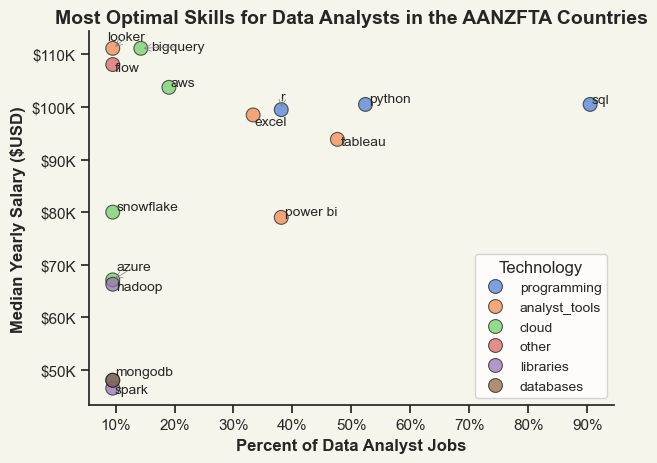

In [15]:
from matplotlib.ticker import PercentFormatter


sns.set_theme(style='ticks')
plt.gcf().set_facecolor('#F6F5EB')  
plt.rcParams['axes.facecolor'] = '#F6F5EB'  

sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology',
    palette='muted',  # Soft, neutral colors
    s=100,  # Marker size
    alpha=0.7,  # Transparency
    edgecolor='k'  # Black edges for better contrast
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt, fontsize=10))

# Adjust text to avoid overlap
adjust_text(
    texts, 
    arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),  # Light gray arrows
    expand_points=(1.2, 1.2),  # Expand spacing between points
    expand_text=(1.2, 1.2)  # Expand spacing around text
)

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs', fontsize=12, weight='bold')
plt.ylabel('Median Yearly Salary ($USD)', fontsize=12, weight='bold')
plt.title('Most Optimal Skills for Data Analysts in the AANZFTA Countries', fontsize=14, weight='bold')
plt.legend(title='Technology', fontsize=10)

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()